In [1]:
#Tarea 2 sismología
import matplotlib.pyplot as plt #modulo para graficar
import numpy as np              #este modulo es para trabajar con matrices como en matlab
import pandas as pd             #modulo para leer archivos
import csv
import scipy.optimize as opt

In [178]:
#Caso 1 modelo unicapa
v_o = 0.5
m = 0.5
R_t = 6372
n = 1000
def v(z):
    return v_o + m * z

def p(theta):
    return R_t * np.sin(theta) / v_o

P = np.linspace(0.1,100,200)
    
def z(thet,p_o): #ec para la profundidad sacada de la conservacion del parametro de rayo
    return (R_t*np.sin(thet)-p_o*v_o)/(m*p_o + np.sin(thet))

def r(thet,p_o):
    return R_t - z(thet,p_o)
Zmax = [] #vector con las profunidades maximas para cada P_o

for i in range(len(P)):
    Zmax.append(z(np.pi/2,P[i]))
    i +=1
Profs = [] #vector con la discretizacion del camino ida y vuelta
Vels = [] #velocidades a lo largo de las trayectorias
rs = [] #distancia del rayo al centro en funcion de la prof
dprofs = [] #diferenciales de profundidad
# Con este ciclo creamos la matriz para los diferentes P_o qoe contiene las profunidades hasta el minimo
for i in range(len(Zmax)):
    thing = np.linspace(0,Zmax[i],n,endpoint = False)
    Profs.append(np.concatenate((thing,np.flip(thing,0))))
    i +=1
    
# Con este ciclo obtenemos las matrices de los parametros que necesitamos para caracterizar todos los rayos 
for i in range(len(Profs)):
    Vels.append(v(Profs[i]))
    rs.append(R_t - Profs[i])
    dprofs.append(Profs[i][1] - Profs[i][0])
    i += 1

thetas = []#angulos a partir de p
for i in range(len(Profs)):
    thetas.append(np.arcsin(Vels[i]*P[i]/rs[i]))
    i += 1

dh = [] #Distancias horizontales, las aproximamos al arco que avanza el rayo
for i in range(len(Profs)):
    dh.append(dprofs[i]*np.tan(thetas[i]))
    i += 1
    
dphi = [] #angulo que avanza en cada iteracion, con respecto al centro de la tierra
for i in range(len(Profs)):
    dphi.append(dh[i]/rs[i])
    i += 1

phi = []
for i in range(len(Profs)):
    phi.append(np.cumsum(dphi[i]))
    i += 1
P

array([  0.1       ,   0.60201005,   1.1040201 ,   1.60603015,
         2.1080402 ,   2.61005025,   3.1120603 ,   3.61407035,
         4.1160804 ,   4.61809045,   5.1201005 ,   5.62211055,
         6.1241206 ,   6.62613065,   7.1281407 ,   7.63015075,
         8.1321608 ,   8.63417085,   9.1361809 ,   9.63819095,
        10.14020101,  10.64221106,  11.14422111,  11.64623116,
        12.14824121,  12.65025126,  13.15226131,  13.65427136,
        14.15628141,  14.65829146,  15.16030151,  15.66231156,
        16.16432161,  16.66633166,  17.16834171,  17.67035176,
        18.17236181,  18.67437186,  19.17638191,  19.67839196,
        20.18040201,  20.68241206,  21.18442211,  21.68643216,
        22.18844221,  22.69045226,  23.19246231,  23.69447236,
        24.19648241,  24.69849246,  25.20050251,  25.70251256,
        26.20452261,  26.70653266,  27.20854271,  27.71055276,
        28.21256281,  28.71457286,  29.21658291,  29.71859296,
        30.22060302,  30.72261307,  31.22462312,  31.72

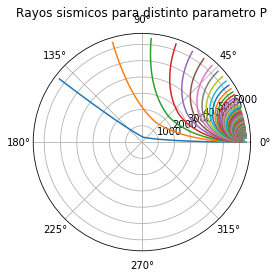

In [179]:
def graf_p(phi,rs):
    plt.figure()
    for i in range(len(phi)):
        plt.polar(phi[i],rs[i])
        i += 1
    plt.title('Rayos sismicos para distinto parametro P')
    
    plt.show
    

graf_p(phi, rs)